In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/content/car data.csv')
df


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


EDA

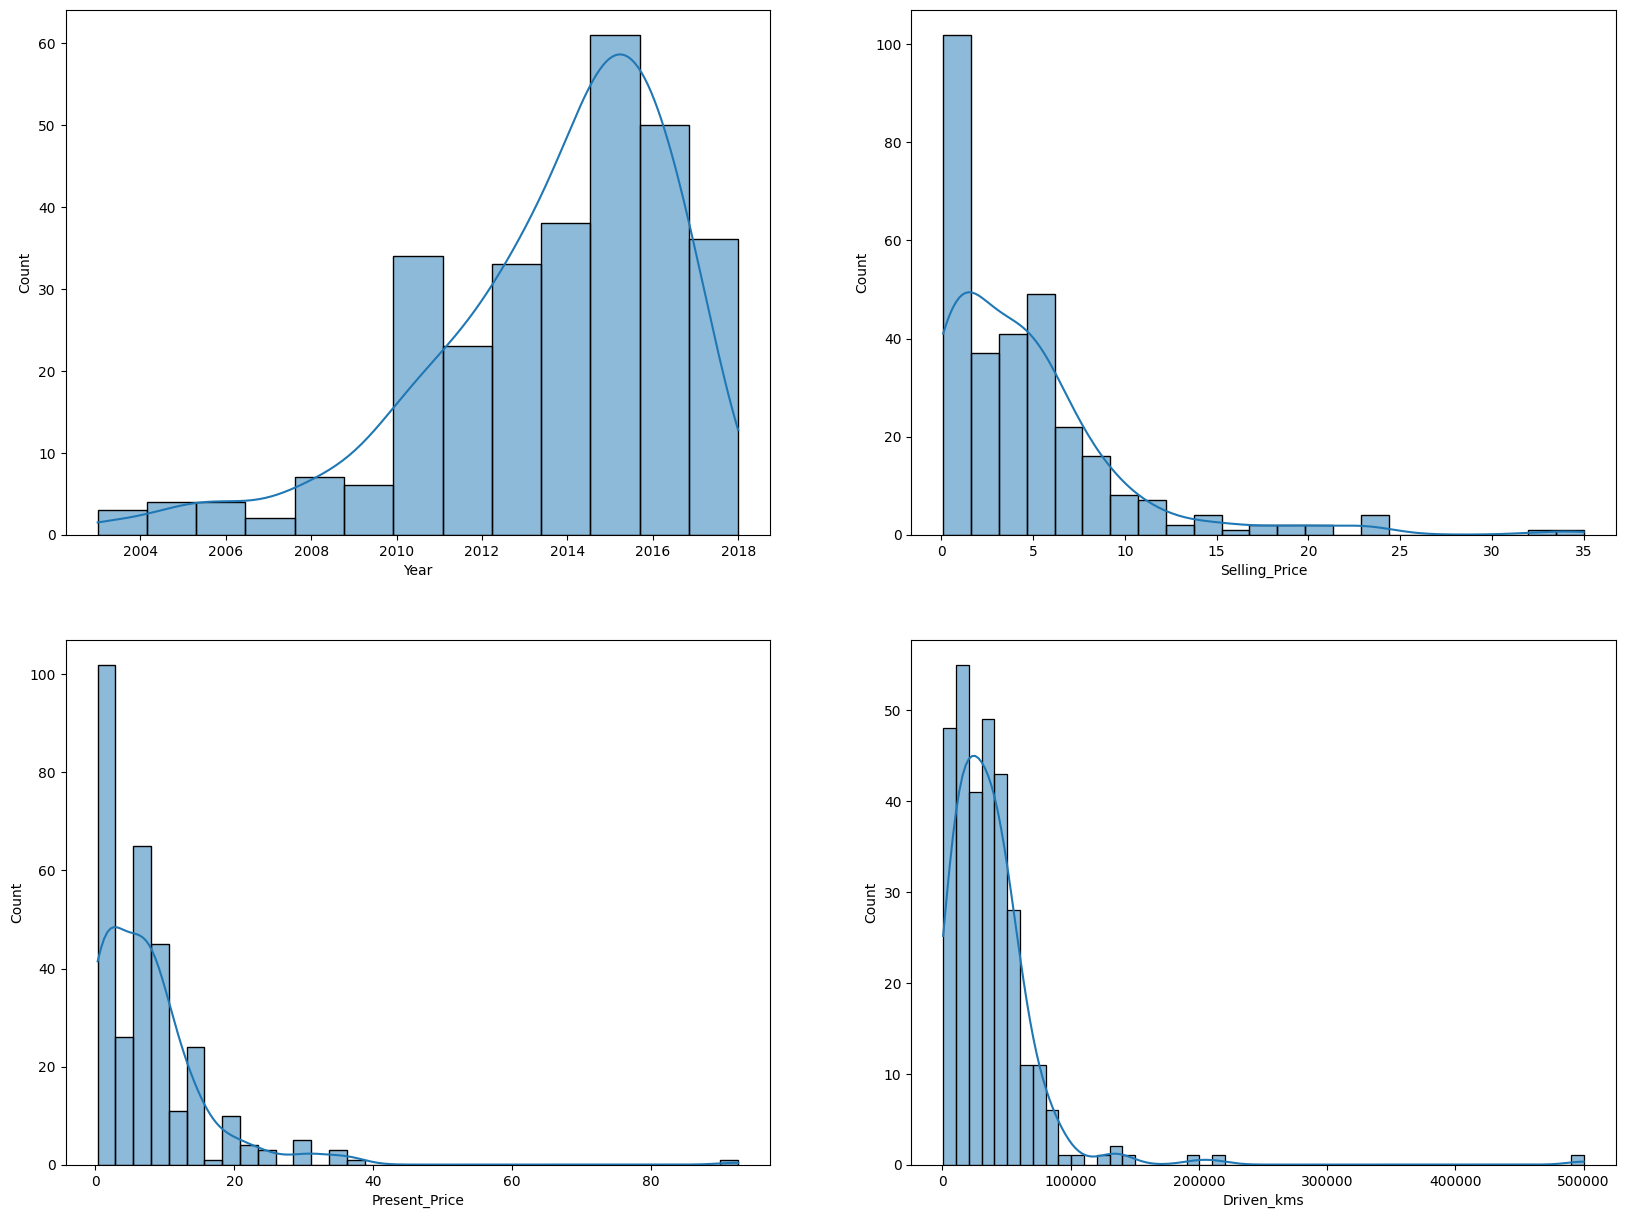

In [6]:
columns = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']


fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.ravel()

for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, ax=axs[i],kde=True)

plt.show()

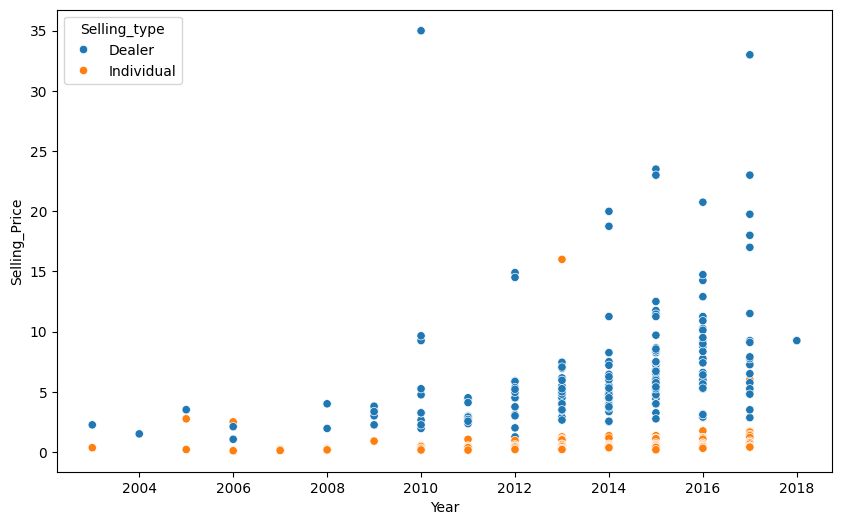

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Year", y="Selling_Price", hue="Selling_type")
plt.show()

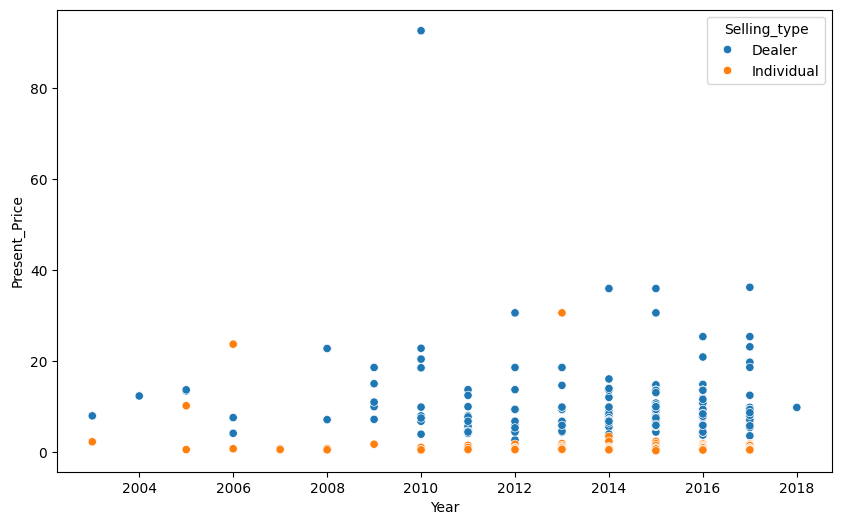

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Year", y="Present_Price", hue="Selling_type")
plt.show()

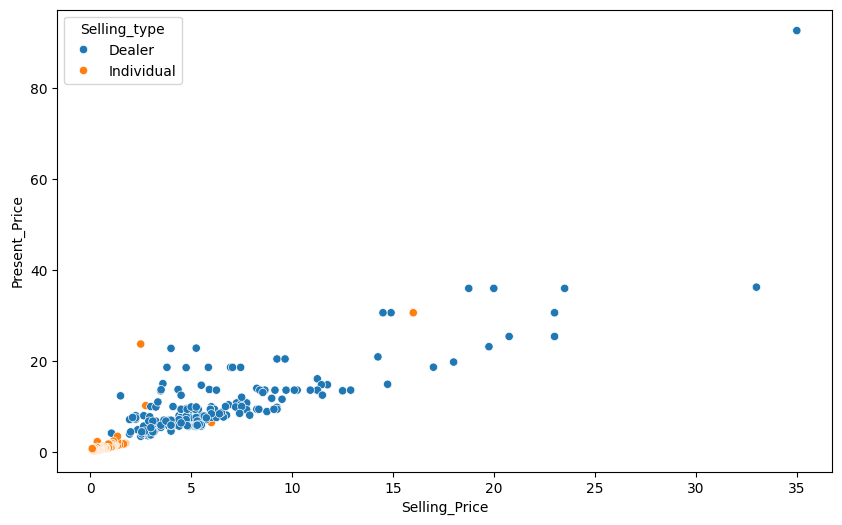

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Selling_Price", y="Present_Price", hue="Selling_type")
plt.show()

<ipython-input-10-a8bbb5b1afe5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
<ipython-input-10-a8bbb5b1afe5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
<ipython-input-10-a8bbb5b1afe5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)


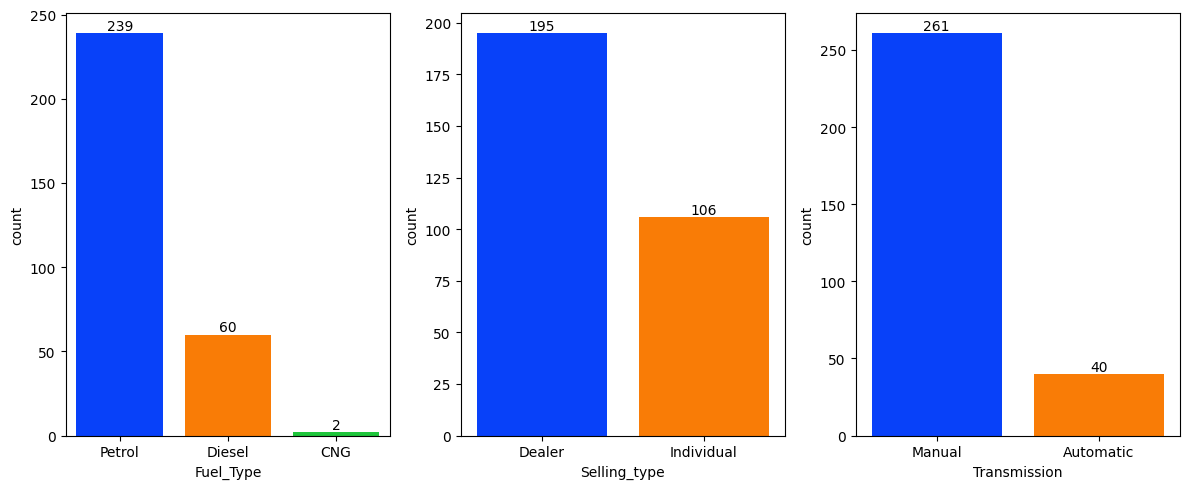

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
axes = axes.ravel()
categorical_columns = ['Fuel_Type','Selling_type','Transmission']

for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)

plt.tight_layout()
plt.show()

Label Encoding On Three Column

In [11]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Correlation Matrix to see the combination between two column to find the importance so that we can reduce one

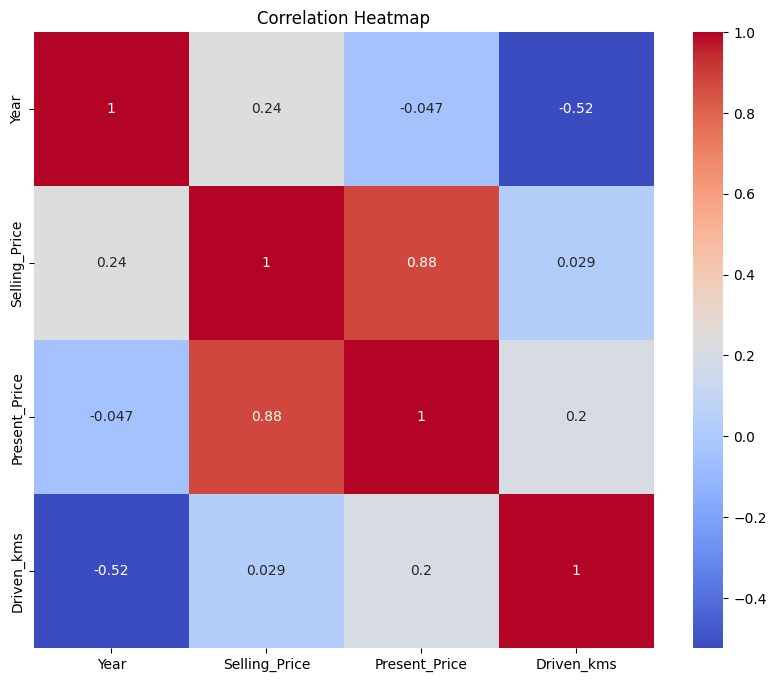

In [12]:
correlation_matrix = df[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

Train And Test Spliting

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(210, 7)
(210,)
(91, 7)
(91,)


Model Evaluation

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,r2_score

In [16]:
models = [
    ("Linear Regression", LinearRegression()),
    ("DecisionTreeRegressor", DecisionTreeRegressor()),
    ("RandomForestRegressor", RandomForestRegressor()),
]


In [17]:
metrics_df = pd.DataFrame(columns=["Model", "R-squared", "mean_squared_error"])

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2_square = r2_score(y_test, y_pred)
    metrics_df = pd.concat(
        [metrics_df, pd.DataFrame({"Model": name, "R-squared": r2_square, "mean_squared_error": mse}, index=[0])],
        ignore_index=True,
    )

print(metrics_df)

                   Model  R-squared  mean_squared_error
0      Linear Regression   0.797514            5.664689
1  DecisionTreeRegressor   0.466489           14.925307
2  RandomForestRegressor   0.832600            4.683127
